In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.externals.joblib import Memory
memory = Memory(cachedir='/tmp', verbose=0)
#@memory.cache above any def fxn.

%matplotlib inline
plt.style.use('ggplot')

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

%load_ext autotime
%reload_ext autotime

In [2]:
#cohort import

os.chdir('/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling') #use to change working directory
wd= os.getcwd() #'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling'

final_pt_df2 = pd.read_csv(wd + '/data/raw/csv/16082018_final_pt_df2.csv' , index_col=0)
patients= list(final_pt_df2['subject_id'].unique())
hadm_id= list(final_pt_df2['hadm_id'].unique())
icustay_id= list(final_pt_df2['icustay_id'].unique())
icustay_id= [int(x) for x in icustay_id]

time: 106 ms


In [3]:
#reading in all of my data that is not limited to 72 hour time window between t_0 and t+72
date= '27082018' 

vaso_dose_72=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_vaso_dose_72.csv' %(date), index_col=0)
#ventsettings_72=pd.read_csv(
#    wd+'/data/raw/csv/72_hr_window/%s_ventsettings_72.csv' %(date), index_col=0)

ventcategory_df=pd.read_csv(
    wd+'/data/raw/csv/%s_ventcategory_df.csv' %(date), index_col=0)

echodata_72=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_echodata_72.csv' %(date), index_col=0)
labs_all_nosummary_72=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_labs_all_nosummary_72.csv' %(date), index_col=0)


weightfirstday_df=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_weightfirstday_df.csv' %(date), index_col=0)
heightfirstday_df=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_heightfirstday_df.csv' %(date), index_col=0)

vitals_all_nosummary_72=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_vitals_all_nosummary_72.csv' %(date), index_col=0)
uti_all_72=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_uti_all_72.csv' %(date), index_col=0)
bg_all_nosummary_72=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_bg_all_nosummary_72.csv' %(date), index_col=0)

rrt_merged_allpt_df=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_rrt_merged_allpt_df.csv' %(date), index_col=0)
gcs72_df=pd.read_csv(
    wd+'/data/raw/csv/72_hr_window/%s_gcs72_df.csv' %(date), index_col=0)

sofa_df_72=pd.read_csv(
    wd+'/data/raw/csv/%s_sofa_df_72.csv' %(date), index_col=0)

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


time: 13.4 s


In [4]:
final_pt_df2.head()

,subject_id,icustay_id,hadm_id,t_0_sc,t_end_sc,ab_course,t_0,t_end_consec,ICU_admit,dod_hosp,dod_ssn,dod_delta,org_list,spec_type_list,sc_result,final_bin
0,24915,267059.0,194424,2182-11-12 01:50:00,2182-11-14 00:00:00,full,2182-11-12,2183-01-15,2182-11-11 20:02:17,2183-01-15 00:00:00,2183-01-15 00:00:00,0 days 00:00:00.000000000,NaN,NaN,negative,C_neg/A_full
1,24942,278729.0,178112,2159-11-07 16:57:00,2159-11-10 00:00:00,partial,2159-11-08,2159-11-10,2159-11-06 11:15:58,NaN,NaN,NaN,NaN,NaN,negative,C_neg/A_partial
2,24968,219670.0,120350,2190-07-31 21:40:00,2190-08-03 00:00:00,partial,2190-08-01,2190-08-02,2190-07-31 20:49:51,2190-08-05 00:00:00,2190-08-05 00:00:00,0 days 00:00:00.000000000,NaN,NaN,negative,C_neg/A_partial
3,24776,295185.0,139951,2154-11-10 23:04:00,2154-11-13 00:00:00,full,2154-11-11,2154-11-19,2154-11-07 20:16:08,2154-11-23 00:00:00,2154-11-23 00:00:00,0 days 00:00:00.000000000,ESCHERICHIA COLI,URINE,positive,C_pos/A_full
4,24714,211472.0,163632,2193-12-11 04:00:00,2193-12-13 00:00:00,full,2193-12-11,2193-12-26,2193-12-11 00:20:56,NaN,NaN,NaN,NaN,NaN,negative,C_neg/A_full


time: 20.6 ms


In [5]:
vaso_dose_72.head(20)

,icustay_id,starttime,endtime,vaso_rate,vaso_amount,label,t_0,delta
4,200349.0,2139-06-02 16:31:00,2139-06-02 18:10:00,0.012030,0.073958,epinephrine,2139-06-02,0 days 16:31:00.000000000
108,200952.0,2139-09-23 15:07:00,2139-09-24 06:43:00,0.020004,1.049601,epinephrine,2139-09-23,0 days 15:07:00.000000000
109,200952.0,2139-09-25 12:00:00,2139-09-25 21:59:00,0.080068,1.962759,epinephrine,2139-09-23,2 days 12:00:00.000000000
110,200952.0,2139-09-25 21:59:00,2139-09-26 07:38:00,0.060601,2.000000,epinephrine,2139-09-23,2 days 21:59:00.000000000
122,200952.0,2139-09-23 23:12:00,2139-09-24 21:54:00,0.149992,7.990853,norepinephrine,2139-09-23,0 days 23:12:00.000000000
123,200952.0,2139-09-24 21:54:00,2139-09-25 13:17:00,0.201337,7.325205,norepinephrine,2139-09-23,1 days 21:54:00.000000000
124,200952.0,2139-09-25 13:17:00,2139-09-26 03:45:00,0.351255,7.958630,norepinephrine,2139-09-23,2 days 13:17:00.000000000
134,200952.0,2139-09-25 09:24:00,2139-09-26 21:27:00,4.800000,99.999663,vasopressin,2139-09-23,2 days 09:24:00.000000000
138,200952.0,2139-09-23 15:06:00,2139-09-24 00:51:00,2.509001,43.660095,phenylephrine,2139-09-23,0 days 15:06:00.000000000
140,201005.0,2169-10-25 17:25:00,2169-10-26 00:00:00,0.020000,0.604800,epinephrine,2169-10-25,0 days 17:25:00.000000000


time: 15.8 ms


# task 1: % MISSINGNESS table
need to look for the amount of patients who are missing any value in any of the categories. want to aggregate all variables and % missingness and source into 1 dataframe

In [6]:
print(
    labs_all_nosummary_72['hadm_id'].nunique(), #15142/15207 unique hadm_id/icustay_id
    labs_all_nosummary_72['subject_id'].nunique() #12744/12801 unique patients in this
)

15142 12744
time: 19.3 ms


In [7]:
def missingness_fxn(df,name, groupby,filteron):
    
    """
    input: dataframe w/ clinical data we want to assess the % missing values on.
    output: a dataframe grouped by the different clinical variables with 
        associated % missingnss (ie how many icustays do not have this value)
        
    """

    missing_df= pd.DataFrame(
        100* (1-(df.groupby(groupby)[filteron].nunique()/ len(hadm_id)))) #number of unique icustays with data /total # icustay
    missing_df.reset_index(inplace=True)
    missing_df= missing_df.rename(index=str, columns={"label":'label', filteron:'%missingness'})
    missing_df['source']= name
    missing_df['data_label']=groupby
    return(missing_df)

time: 10.5 ms


#### all dataframes to do %missingness on (add x when complete)
- vaso_dose_72 : x
- ventcategory_df : x
- echodata_72 : ?
- labs_all_nosummary_72 : x
- weightfirstday_df : x
- heightfirstday_df : x
- vitals_all_nosummary_72 :x
- uti_all_72 :x
- bg_all_nosummary_72 :x
- rrt_merged_allpt_df :x
- gcs72_df : x
- sofa_df_72: 

In [8]:
missingness_df= pd.DataFrame()

time: 1.08 ms


### labs x

In [9]:
print(
    labs_all_nosummary_72['hadm_id'].nunique(), #15142/15207 unique hadm_id/icustay_id
    labs_all_nosummary_72['subject_id'].nunique() #12744/12801 unique patients in this
)

15142 12744
time: 13.2 ms


In [10]:
#na values
labs_all_nosummary_72.loc[labs_all_nosummary_72['valuenum'].isna(),:]

,subject_id,hadm_id,icustay_id,charttime,label,valuenum,t_0,delta
839176,13940,137769,298457,2192-12-12 02:20:00,INR,NaN,2192-12-12,0 days 02:20:00.000000000


time: 10.9 ms


In [11]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(labs_all_nosummary_72,'labs_all_nosummary_72', 'label','icustay_id')]
)

time: 162 ms


### vaso_dose x

In [12]:
print(
    vaso_dose_72['icustay_id'].nunique(), #4777/15207 unique icustay_id/icustay_id
)

4777
time: 1.81 ms


In [13]:
vaso_dose_72.head(2)

,icustay_id,starttime,endtime,vaso_rate,vaso_amount,label,t_0,delta
4,200349.0,2139-06-02 16:31:00,2139-06-02 18:10:00,0.012030,0.073958,epinephrine,2139-06-02,0 days 16:31:00.000000000
108,200952.0,2139-09-23 15:07:00,2139-09-24 06:43:00,0.020004,1.049601,epinephrine,2139-09-23,0 days 15:07:00.000000000


time: 18.1 ms


In [14]:
vaso_dose_72.loc[vaso_dose_72['vaso_rate'].isna(),:]

,icustay_id,starttime,endtime,vaso_rate,vaso_amount,label,t_0,delta


time: 6.93 ms


In [15]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(vaso_dose_72,'vaso_dose_72', 'label','icustay_id')]
)

time: 10.3 ms


### ventcategory_df x

In [16]:
ventcategory_df.head()

,icustay_id,t_0,vent_day1,vent_day2,vent_day3
0,267059.0,2182-11-12,Mech,None,None
1,278729.0,2159-11-08,Oxygen,Mech,None
2,219670.0,2190-08-01,Oxygen,None,None
3,295185.0,2154-11-11,Oxygen,None,None
4,211472.0,2193-12-11,None,None,None


time: 8.46 ms


In [17]:
#need to reshape the dataframe
ventcategory_df_melt = pd.melt(ventcategory_df, id_vars=['icustay_id','t_0'], var_name='label')

print(
    ventcategory_df_melt['icustay_id'].nunique(), #15207/15207 unique icustay_id/icustay_id
)

15207
time: 11.5 ms


In [18]:
ventcategory_df_melt.head(2)

,icustay_id,t_0,label,value
0,267059.0,2182-11-12,vent_day1,Mech
1,278729.0,2159-11-08,vent_day1,Oxygen


time: 6.69 ms


In [19]:
#na values
ventcategory_df_melt.loc[ventcategory_df_melt['value'].isnull()]

,icustay_id,t_0,label,value


time: 7.41 ms


In [20]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(ventcategory_df_melt,'ventcategory_df', 'label','icustay_id')]
)

time: 12.1 ms


### echodata_72

In [21]:
echodata_72.head(2)

,row_id,subject_id,hadm_id,chartdate,charttime,indication,height,weight,bsa,bp,bpsys,bpdias,hr,status,test,doppler,contrast,technicalquality,t_0,delta
0,59653,31038,174978.0,2102-06-14 00:00:00,2102-06-14 13:30:00,Endocarditis.,74.0,165.0,2.00,102/72,102.0,72.0,86.0,Inpatient,Portable TTE (Complete),Full Doppler and color Doppler,None,Adequate,2102-06-13,1 days 13:30:00.000000000
1,59654,70150,156140.0,2191-05-10 00:00:00,2191-05-10 15:08:00,"CHF, A-FIB",66.0,263.0,2.25,107/81,107.0,81.0,95.0,Outpatient,TTE (Complete),Full Doppler and color Doppler,None,Suboptimal,2191-05-10,0 days 15:08:00.000000000


time: 21.5 ms


In [22]:
#num of icustay_id/hadm_id
print(
    echodata_72['hadm_id'].nunique(), #5421/15207 unique hadm_id/icustay_id
)

5421
time: 1.86 ms


In [23]:
#number of na values

pd.DataFrame(
    {
    'bsa':[echodata_72.loc[echodata_72['bsa'].isna(),'hadm_id'].count()], 
    'bp': [echodata_72.loc[echodata_72['bp'].isna(),'hadm_id'].count()], 
    'bpsys': [echodata_72.loc[echodata_72['bpsys'].isna(),'hadm_id'].count()], 
    'bpdias': [echodata_72.loc[echodata_72['bpdias'].isna(),'hadm_id'].count()],
    'hr': [echodata_72.loc[echodata_72['hr'].isna(),'hadm_id'].count()],
    'test': [echodata_72.loc[echodata_72['test'].isna(),'hadm_id'].count()]
             }
            )

,bp,bpdias,bpsys,bsa,hr,test
0,512,524,524,1110,707,0


time: 15 ms


# NEED TO ASK ABOUT WHICH VALUES ARE MOST IMPORTANT IN THIS

In [24]:
# missingness_df = pd.concat(
#     [missingness_df,
#         missingness_fxn(labs_all_nosummary_72,'labs_all_nosummary_72', 'label','icustay_id')]
# )

time: 706 µs


### weightfirstday_df x

In [25]:
#delete once done debugging
weightfirstday_df=pd.read_csv(
    '/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/raw/csv/72_hr_window/%s_weightfirstday_df.csv' %(date), index_col=0)

time: 19.2 ms


In [26]:
#need to reshape the df

weightfirstday_df_melt= pd.melt(weightfirstday_df, id_vars='icustay_id', var_name='label')
#weightfirstday_df_melt

time: 8.89 ms


In [27]:
print(
    weightfirstday_df_melt['icustay_id'].nunique(), #15207/15207 unique icustay_id/icustay_id
)

15207
time: 2.4 ms


In [28]:
#na values
weightfirstday_df_melt.loc[weightfirstday_df_melt['value'].isna(),'icustay_id'].count() #1522/15207 do not have any weight, 39522 total null rows.

39522

time: 3.91 ms


In [29]:
#missingness df
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(weightfirstday_df_melt.loc[weightfirstday_df_melt['value'].notnull(),:],'weightfirstday_df', 'label','icustay_id')]
)

time: 14.5 ms


In [30]:
missingness_df

,label,%missingness,source,data_label
0,ALBUMIN,54.060630,labs_all_nosummary_72,label
1,ANION GAP,0.710199,labs_all_nosummary_72,label
2,BANDS,83.231407,labs_all_nosummary_72,label
3,BICARBONATE,0.637864,labs_all_nosummary_72,label
4,BILIRUBIN,44.933254,labs_all_nosummary_72,label
5,BUN,0.611560,labs_all_nosummary_72,label
6,CHLORIDE,0.598409,labs_all_nosummary_72,label
7,CREATININE,0.598409,labs_all_nosummary_72,label
8,GLUCOSE,0.585257,labs_all_nosummary_72,label
9,HEMATOCRIT,0.624712,labs_all_nosummary_72,label


time: 12.8 ms


### heightfirstday_df x

In [31]:
heightfirstday_df.head(2)

,icustay_id,height,height_chart,height_echo
4,216859,172.72,NaN,172.72
5,203487,185.42,185.42,182.88


time: 7.2 ms


In [32]:
#need to reshape the df
heightfirstday_df_melt= pd.melt(heightfirstday_df, id_vars='icustay_id', var_name='label')

time: 4.35 ms


In [33]:
print(
    heightfirstday_df_melt['icustay_id'].nunique(), #15207/15207 unique icustay_id/icustay_id
)

15207
time: 2.31 ms


In [34]:
#na values
print(
    heightfirstday_df_melt.loc[heightfirstday_df_melt['value'].isna(),'icustay_id'].count(), #22776 total null rows.
    heightfirstday_df.loc[heightfirstday_df['height'].isna(),'icustay_id'].count() #5212/15207 do not have any weight,
)

22776 5212
time: 3.69 ms


In [35]:
#missingness df
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(heightfirstday_df_melt.loc[heightfirstday_df_melt['value'].notnull(),:],'heightfirstday_df', 'label','icustay_id')]
)

time: 11.8 ms


In [36]:
missingness_df

,label,%missingness,source,data_label
0,ALBUMIN,54.060630,labs_all_nosummary_72,label
1,ANION GAP,0.710199,labs_all_nosummary_72,label
2,BANDS,83.231407,labs_all_nosummary_72,label
3,BICARBONATE,0.637864,labs_all_nosummary_72,label
4,BILIRUBIN,44.933254,labs_all_nosummary_72,label
5,BUN,0.611560,labs_all_nosummary_72,label
6,CHLORIDE,0.598409,labs_all_nosummary_72,label
7,CREATININE,0.598409,labs_all_nosummary_72,label
8,GLUCOSE,0.585257,labs_all_nosummary_72,label
9,HEMATOCRIT,0.624712,labs_all_nosummary_72,label


time: 12.6 ms


### vitals_all_nosummary_72 x

In [37]:
vitals_all_nosummary_72.head(2)

,subject_id,hadm_id,icustay_id,charttime,vitalid,valuenum,t_0,delta
5,9,150750,220597,2149-11-13 15:20:00,MeanArtPress,61.0,2149-11-13,0 days 15:20:00.000000000
6,9,150750,220597,2149-11-14 11:00:00,MeanArtPress,103.0,2149-11-13,1 days 11:00:00.000000000


time: 9.59 ms


In [38]:
#na values
vitals_all_nosummary_72.loc[vitals_all_nosummary_72['vitalid'].notnull(),:]#.count() #6930 NULL values

vitals_all_nosummary_nonull= vitals_all_nosummary_72.loc[vitals_all_nosummary_72['vitalid'].notnull(),:]#.count() #6930 NULL values

#why do i have null vitalid's with actual values? need to dive into the sql.
###it looks like it may just extract a lot of values as null that are not relevant, can filter these out

time: 1.36 s


In [39]:
print(
    vitals_all_nosummary_nonull['icustay_id'].nunique(), #14714/15207 unique icustay_id/icustay_id
)

14714
time: 35.8 ms


In [40]:
vitals_all_nosummary_nonull

,subject_id,hadm_id,icustay_id,charttime,vitalid,valuenum,t_0,delta
5,9,150750,220597,2149-11-13 15:20:00,MeanArtPress,61.0,2149-11-13,0 days 15:20:00.000000000
6,9,150750,220597,2149-11-14 11:00:00,MeanArtPress,103.0,2149-11-13,1 days 11:00:00.000000000
7,9,150750,220597,2149-11-14 12:00:00,MeanArtPress,134.0,2149-11-13,1 days 12:00:00.000000000
12,9,150750,220597,2149-11-13 07:00:00,MeanArtPress,85.0,2149-11-13,0 days 07:00:00.000000000
13,9,150750,220597,2149-11-14 02:00:00,MeanArtPress,96.0,2149-11-13,1 days 02:00:00.000000000
16,9,150750,220597,2149-11-13 10:00:00,MeanArtPress,92.0,2149-11-13,0 days 10:00:00.000000000
18,9,150750,220597,2149-11-13 00:30:00,MeanArtPress,104.0,2149-11-13,0 days 00:30:00.000000000
19,9,150750,220597,2149-11-13 17:00:00,MeanArtPress,84.0,2149-11-13,0 days 17:00:00.000000000
29,9,150750,220597,2149-11-13 18:00:00,MeanArtPress,93.0,2149-11-13,0 days 18:00:00.000000000
46,9,150750,220597,2149-11-13 04:00:00,MeanArtPress,104.0,2149-11-13,0 days 04:00:00.000000000


time: 35.7 ms


In [41]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(vitals_all_nosummary_nonull.rename(index=str, columns={'vitalid':'label'}),'vitals_all_nosummary_72', 'label','icustay_id')]
)

time: 4.84 s


### uti_all_72 x

In [42]:
uti_all_72=pd.read_csv(
    '/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/raw/csv/72_hr_window/%s_uti_all_72.csv' %(date), index_col=0)

time: 544 ms


In [43]:
uti_all_72.head(2)

,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,label,fluid,category,loinc_code,icd9_code,t_0,delta
42,26,197661.0,51486,2126-05-10 14:59:00,NEG,NaN,NaN,Leukocytes,Urine,Hematology,5799-2,99604,2126-05-10,0 days 14:59:00.000000000
43,26,197661.0,51486,2126-05-10 14:59:00,NEG,NaN,NaN,Leukocytes,Urine,Hematology,5799-2,4271,2126-05-10,0 days 14:59:00.000000000


time: 13.7 ms


In [44]:
#uti_all_72_melt= pd.melt(uti_all_72, id_vars=['subject_id','hadm_id','itemid','charttime','t_0','delta'], var_name='label')

time: 433 µs


In [45]:
uti_all_72_melt= pd.melt(
    uti_all_72[['hadm_id','charttime','value','valuenum','valueuom','label','fluid']],
    id_vars=['hadm_id','charttime'], var_name='label')

time: 242 ms


In [46]:
uti_all_72_melt_notnull= uti_all_72_melt[uti_all_72_melt['value'].notnull()] #1320954

time: 97 ms


In [47]:
uti_all_72_melt_notnull['label'].value_counts()

value    220159
label    220159
fluid    220159
Name: label, dtype: int64

time: 92.2 ms


In [48]:
print(
    uti_all_72_melt_notnull.nunique(), #6145/15207 unique hadm_id/hadm_id
)

hadm_id      6145
charttime    7795
label           3
value          11
dtype: int64
time: 276 ms


In [49]:
#na values
#uti_all_72_melt.loc[uti_all_72_melt['value'].isna(),:]#.count() #220159 na valuenum, 440318 when melted
#uti_all_72_melt[uti_all_72_melt['value'].isnull()]['hadm_id'].count() #440318

time: 660 µs


In [50]:
#uti_all_72_melt[uti_all_72_melt['value'].notnull()]

time: 525 µs


In [51]:
missingness_fxn(uti_all_72_melt_notnull,'uti_all_72_melt', 'label','hadm_id')

,label,%missingness,source,data_label
0,fluid,59.590978,uti_all_72_melt,label
1,label,59.590978,uti_all_72_melt,label
2,value,59.590978,uti_all_72_melt,label


time: 106 ms


In [52]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(uti_all_72_melt_notnull,'uti_all_72_melt', 'label','hadm_id')]
)

time: 80.3 ms


### bg_all_nosummary_72 x

In [53]:
bg_all_nosummary_72=pd.read_csv(
    '/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/raw/csv/72_hr_window/%s_bg_all_nosummary_72.csv' %(date), index_col=0)

time: 1.45 s


In [54]:
#na values- removing all null values from value.
bg_all_nosummary_72= bg_all_nosummary_72.loc[bg_all_nosummary_72['value'].notnull(),:]

bg_all_nosummary_72.head(2)

,subject_id,hadm_id,icustay_id,charttime,label,valuenum,value,unique_var,t_0,delta
82,9,150750,220597,2149-11-13 03:34:00,BASEEXCESS,NaN,-1,2205972149-11-13 03:34:00,2149-11-13,0 days 03:34:00.000000000
83,9,150750,220597,2149-11-13 03:34:00,CALCIUM,1.05,1.05,2205972149-11-13 03:34:00,2149-11-13,0 days 03:34:00.000000000


time: 98.9 ms


In [55]:
print(
    bg_all_nosummary_72['icustay_id'].nunique(), #11244/15207 unique icustay_id/icustay_id
)

11244
time: 12.8 ms


In [56]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(bg_all_nosummary_72,'bg_all_nosummary_72', 'label','icustay_id')]
)

time: 108 ms


In [57]:
#missingness_fxn(bg_all_nosummary_72,'bg_all_nosummary_72', 'label','icustay_id')

time: 544 µs


### rrt_merged_allpt_df x

In [58]:
rrt_merged_allpt_df.head(10)

,icustay_id,t_0,first_charttime,rrt
0,267059.0,2182-11-12,NaN,NaN
1,278729.0,2159-11-08,NaN,NaN
2,219670.0,2190-08-01,NaN,NaN
3,295185.0,2154-11-11,NaN,NaN
4,211472.0,2193-12-11,NaN,NaN
5,259012.0,2120-05-24,NaN,NaN
6,231735.0,2186-04-13,NaN,NaN
7,252135.0,2166-04-13,2166-04-13 00:00:00,1.0
8,293255.0,2167-10-21,2167-10-21 04:31:00,1.0
9,261279.0,2167-10-26,2167-10-26 01:00:00,1.0


time: 9.09 ms


In [59]:
#na values
rrt_merged_allpt_df_notnull = rrt_merged_allpt_df.loc[rrt_merged_allpt_df['rrt'].notnull(),:]

time: 1.83 ms


In [60]:
print(
    rrt_merged_allpt_df_notnull['icustay_id'].nunique(), #1223/15207 unique icustay_id/icustay_id
)

1223
time: 1.28 ms


In [61]:
#missingness_fxn(rrt_merged_allpt_df_notnull.rename(index=str,columns={'rrt':"label"}),'rrt_merged_allpt_df_notnull', 'label','icustay_id')

time: 475 µs


In [62]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(rrt_merged_allpt_df_notnull.rename(index=str,columns={'rrt':"label"}),'rrt_merged_allpt_df_notnull', 'label','icustay_id')]
)

time: 18.9 ms


### gcs72_df x

In [63]:
gcs72_df.head(2)

,subject_id,hadm_id,icustay_id,day,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,ICU_admit,t_0,admit_plus_day,delta
0,28448,177527,200012,1.0,15.0,6.0,5.0,4.0,0.0,2153-12-23 05:12:55,2153-12-23,2153-12-24 05:12:55,1 days 05:12:55.000000000
1,9514,127229,200014,2.0,13.0,6.0,3.0,4.0,0.0,2105-02-16 23:16:48,2105-02-17,2105-02-18 23:16:48,1 days 23:16:48.000000000


time: 17.7 ms


In [64]:
#need to reshape the dataframe
gcs72_df_melt = pd.melt(gcs72_df, id_vars=['subject_id','hadm_id','icustay_id','t_0','ICU_admit','admit_plus_day','delta'], var_name='label')

time: 23.2 ms


In [65]:
gcs72_df_melt_notnull= gcs72_df_melt[gcs72_df_melt['value'].notnull()] #62772 ->62650

time: 6.65 ms


In [66]:
print(
    gcs72_df_melt_notnull['icustay_id'].nunique(), #10462/15207 unique icustay_id/icustay_id
)

10462
time: 2.42 ms


In [67]:
missingness_fxn(gcs72_df_melt_notnull,'gcs72_df_melt_notnull', 'label','icustay_id')

,label,%missingness,source,data_label
0,day,31.202736,gcs72_df_melt_notnull,label
1,endotrachflag,31.202736,gcs72_df_melt_notnull,label
2,gcseyes,31.301374,gcs72_df_melt_notnull,label
3,gcsmotor,31.538107,gcs72_df_melt_notnull,label
4,gcsverbal,31.570987,gcs72_df_melt_notnull,label
5,mingcs,31.202736,gcs72_df_melt_notnull,label


time: 17.3 ms


In [68]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(gcs72_df_melt_notnull,'gcs72_df_melt_notnull', 'label','icustay_id')]
)

time: 9.51 ms


### sofa_df_72

In [69]:
sofa_df_72.head(2)

,subject_id,hadm_id,icustay_id,day,sofa,respiration,pao2fio2_vent_min,pao2fio2_novent_min,coagulation,platelet_min,...,meanbp_min,cns,mingcs,renal,creatinine_max,urineoutput,t_0,ICU_admit,approx_charttime,floor_charttime
4,9,150750,220597,4.0,6,0.0,204.0,NaN,0.0,306.0,...,54.0,NaN,NaN,2.0,2.0,6020.0,2149-11-13,2149-11-09 13:07:02,2149-11-13 13:07:02,2149-11-13 00:00:00
5,9,150750,220597,5.0,7,NaN,NaN,NaN,NaN,NaN,...,91.0,NaN,NaN,4.0,NaN,100.0,2149-11-13,2149-11-09 13:07:02,2149-11-14 13:07:02,2149-11-14 00:00:00


time: 20.7 ms


In [70]:
#need to reshape the dataframe
sofa_df_melt = pd.melt(sofa_df_72, id_vars=['subject_id','hadm_id','icustay_id','t_0','day','ICU_admit','approx_charttime','floor_charttime'], var_name='label')

time: 144 ms


In [72]:
sofa_df_melt_notnull= sofa_df_melt[sofa_df_melt['value'].notnull()] #606651 ->302459

time: 27.6 ms


In [73]:
len(sofa_df_melt_notnull)

302459

time: 1.77 ms


In [74]:
print(
    sofa_df_melt_notnull['icustay_id'].nunique(), #13323/15207 unique icustay_id/icustay_id
)

13323
time: 3.52 ms


In [75]:
missingness_df = pd.concat(
    [missingness_df,
        missingness_fxn(sofa_df_melt_notnull,'sofa_df_melt_notnull', 'label','icustay_id')]
)

time: 60.8 ms


In [ ]:
missingness_df = missingness_df.sort_values('%missingness', ascending=False)

date= '27082018'

pd.DataFrame(missingness_df).to_csv(
    '/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/interim/%s_missingness_df.csv' %(date))

In [77]:
missingness_df

,label,%missingness,source,data_label
0,ALBUMIN,54.060630,labs_all_nosummary_72,label
1,ANION GAP,0.710199,labs_all_nosummary_72,label
2,BANDS,83.231407,labs_all_nosummary_72,label
3,BICARBONATE,0.637864,labs_all_nosummary_72,label
4,BILIRUBIN,44.933254,labs_all_nosummary_72,label
5,BUN,0.611560,labs_all_nosummary_72,label
6,CHLORIDE,0.598409,labs_all_nosummary_72,label
7,CREATININE,0.598409,labs_all_nosummary_72,label
8,GLUCOSE,0.585257,labs_all_nosummary_72,label
9,HEMATOCRIT,0.624712,labs_all_nosummary_72,label


time: 20 ms


### visualizations

In [ ]:
"""
    get the # of filled vs missign values for each variable for our cohort.
    Args:
    -----
    df: dataframe
        name of dataframe initialized in this workbook
    valuenum_col: string
        name of column with the numerical or text variable in question
    label_col: string
        name of column with the lab value label in question
    Returns:
    -----
    filled_summary: df
        list of all variables with # filled values
    missing_summary: df
        list of all variables with # missing values
    percent_summary: df
        list of all variables with # filled values/ # total patients
    """

def missing_fxn(df, valuenum_col, label_col):
    if 'icustay_id' in list(df):
        df= df[df['icustay_id'].isin(list(cohort_df['icustay_id'].unique()))] #good
    else:
        df= df[df['subject_id'].isin(
            list(cohort_df['subject_id'].unique()))] 

    df_notnull = df[df[valuenum_col].notnull()]
    df_null = df[df[valuenum_col].isnull()]
    df_filtered = df.drop_duplicates(['subject_id',label_col])[label_col].value_counts()
    
    filled_summary= df_notnull.drop_duplicates(['subject_id',label_col])[label_col].value_counts()
    missing_summary = df_null.drop_duplicates(['subject_id',label_col])[label_col].value_counts()
    percent_summary = 100*(filled_summary / df_filtered)
    
    #missing_plot=(missing_summary.sort_index().plot.bar(title = f'# of missing values in {df}'))
    
    #filled_summary, missing_summary, percent_summary, 
    return(filled_summary, missing_summary, percent_summary)

In [ ]:
var1, var2, var3,  = missing_fxn(labs_all48, 'valuenum', 'label')
fig, axs = plt.subplots(1,2,figsize=(10,4))
ax1= (var2.sort_index().plot.bar(ax=axs[0], title = '# of missing values in labs_all48'))
ax2= (var3.sort_index().plot.bar(color='grey',
                                ax=axs[1],
                                ylim=(min(var3)-10 ,100),
                                title = '% of values filled in labs_all48'))

#### histogram of frequency over each hour.

In [10]:
def hours_fxn(td):
    return ((td.days*24*3600) + td.seconds)//3600

def days_fxn(td):
    return td.days

time: 2.48 ms


In [18]:
pd.to_timedelta(vaso_dose_72['delta'].head())

4     0 days 16:31:00
108   0 days 15:07:00
109   2 days 12:00:00
110   2 days 21:59:00
122   0 days 23:12:00
Name: delta, dtype: timedelta64[ns]

time: 4.6 ms


In [21]:
for element in vaso_dose_72['label'].unique():
    print(element)

epinephrine
norepinephrine
vasopressin
phenylephrine
dopamine
dobutamine
time: 3.31 ms


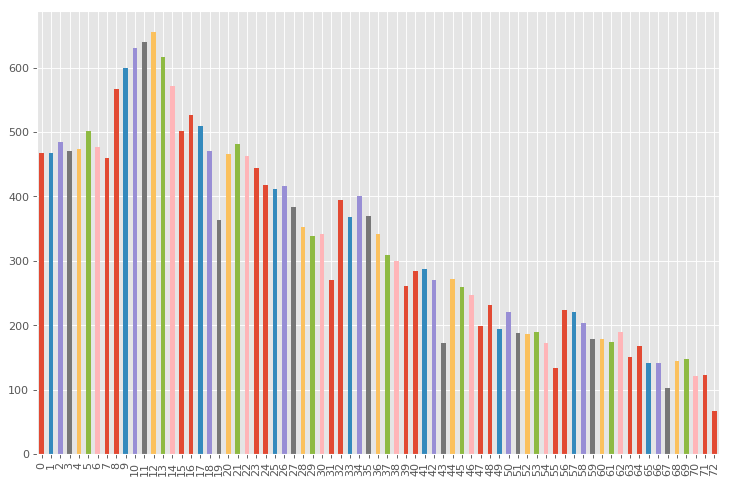

time: 2.01 s


In [22]:
size=11
fig=plt.figure(figsize=(size, size*(2/3)), dpi= 80, facecolor='w')
ax = plt.axes()

vaso_dose_72['hours']=pd.to_timedelta(vaso_dose_72['delta']).map(hours_fxn) #good

for element in vaso_dose_72['label'].unique():    
    (vaso_dose_72.loc[vaso_dose_72.loc[:,'label']==element, 'hours']
         .value_counts(sort=False)
         .sort_index()
         .plot(kind='bar', sort_columns=True))

epinephrine


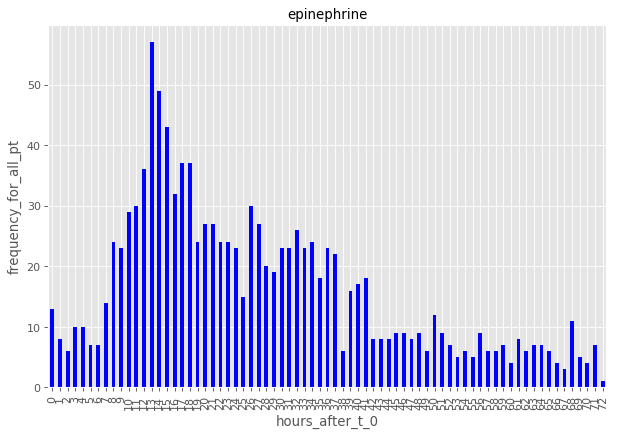

norepinephrine


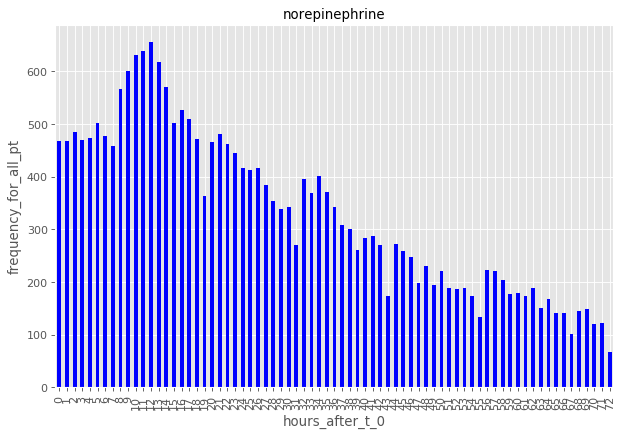

vasopressin


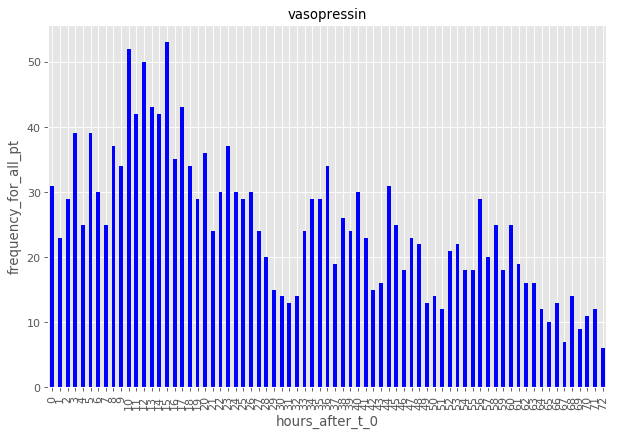

phenylephrine


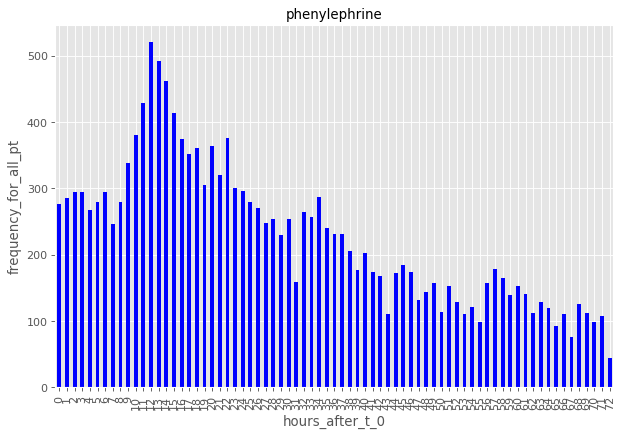

dopamine


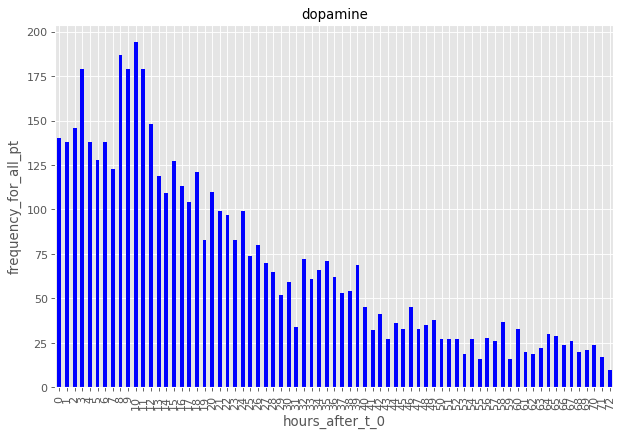

dobutamine


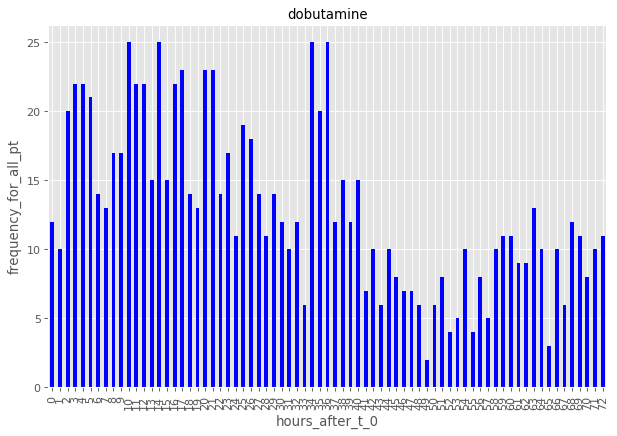

time: 3.61 s


In [30]:
for element in vaso_dose_72['label'].unique():
    size=9
    fig=plt.figure(figsize=(size, size*(2/3)), dpi= 80, facecolor='w')
    ax = plt.axes()
    (vaso_dose_72.loc[vaso_dose_72.loc[:,'label']==element, 'hours']
         .value_counts(sort=False)
         .sort_index()
         .plot(kind='bar', sort_columns=True,color='blue'))
    print(element)
    ax.set_ylabel('frequency_for_all_pt', fontsize='large')
    ax.set_xlabel('hours_after_t_0', fontsize='large')
    ax.set_title('%s'%(element), fontsize='large')
    plt.show()

In [42]:
# #looking at overall missingness

# for element in vaso_dose_72['label'].unique():
#     print(element)
#     print(vaso_dose_72.loc[vaso_dose_72.loc[:,'label']==element, 'icustay_id']
#          .nunique())
#     print(((vaso_dose_72.loc[vaso_dose_72.loc[:,'label']==element, 'icustay_id']
#          .nunique())/len(icustay_id))*100,"% of icustay_id's with any value") 

epinephrine
309
2.0319589662655355 % of icustay_id's with any value
norepinephrine
2937
19.313474057999606 % of icustay_id's with any value
vasopressin
843
5.543499704083646 % of icustay_id's with any value
phenylephrine
2351
15.459985532978235 % of icustay_id's with any value
dopamine
878
5.77365686854738 % of icustay_id's with any value
dobutamine
240
1.5782205563227463 % of icustay_id's with any value
time: 57.4 ms


In [33]:
# print(vaso_dose_72['icustay_id'].nunique())

4777
time: 1.98 ms


In [36]:
# len(icustay_id)

15207

time: 1.88 ms
